 <!-- {{< include ./text/abstract_text.txt >}}  -->

<!-- #  {{< includes ./_abstract.md >}}  -->
<!-- All code can be viewed on GitHub at <https://github.com/atdiausx2/albudurarrtu>  -->

## Abstract

In the world of education, a person's path is often depicted as a linear progression, where students follow a predefined journey from kindergarten to graduation. However, the reality is far more complex. There could be various reasons that emerge during the study program that led students to deviate from this path. These students might encounter different challenges, circumstances, or a lack of proper resources that have led them to drop out of university.

In this dataset provided to us, we will delve deeper into understanding the reasons why students have dropped out of the university. We will leverage our social knowledge to comprehend the factors that influenced their decision to drop out and work to prevent such occurrences if the issues are within the university's purview. Our goal is to propose solutions and their support so that high schools could facilitate and secure students' educational journeys. We construct the best basic model that predicts the results with 73% balanced precision recall. We provide the recommedatons based on findings and define auxiliary requisite data to further our research in the future. 
<!-- We will also use the analysis we've conducted on the dropout students to learn from their experiences and chart a unique educational pathway with fewer dropouts. -->

# Goals and Objectives 

# Introduction

Starting from preliminary school we are told that having an education is very important for your future or that without higher education your job possibilities are going to be very limited.
While primary education is mandatory, having higher education is not. There are, however, many reasons for which people may want to pursue higher education. 
 According to studies, many factors are materialistic, the most important factor for pursuing higher education is job acquisition [@knutsen_motivation_2011]. Some other factors may include increased income in the existing job, improved work conditions or increased ability for retirement. Of course, other, more intrisic factors include seeking for additional knowledge or self-fulfillment [@cortes_factors_2023]. There are also factors like meeting new friends, improving social interaction skills or just wanting to make a difference in the world.
Of course factors that cannot be ignored are social pressure [@temple_factors_2009], meaning that having friends that want to pursue higher education can influence ones own decision or influence of family members.
However, there are people that discontinue their studies prematurely and we are interested to learn what the reasons for such a decision could be.
Based on the study and datasets that we used for our research there are multiple factors that influence dropping out.


Nevertheless, pursuing higher education and actually getting the degree has some tangible benefits.
According to an OECD – Education at a Glance 2019 research paper [@oecd_education_2019].

> “On average across OECD countries, adults with a short-cycle tertiary degree earn 20% more than adults with upper secondary education. The earnings advantage increases to 44% for those with a bachelor’s degree and to 91% for those with a master’s or doctoral degree.”

With this in mind, it is important for government and educational institutions to ensure high level of graduates in society to ensure economic growth and overall increase in well-being.
To measure the success of this goal, it is important to set KPI’s, track them and make educated conclusions on what needs to be done or is being done right to reach the goal of higher educated society.


# Target Metrics and KPI {#sec-kpi}

In this particular case, KPI’s will be chosen based on datasets of Portugese High Schools but most likely data can be generalised, atleast for Europe, as the region and sociodemographics are not so different.
Even though there are many factors that influence the success of graduation, only factors that can be proven  by government and educational institutions will be chosen. In order to thwart embezzlement, indicators should be restricted in magnitude and difficult to falsify or manipulate.  After rigorous analysis, we propose the following KPIs.

   a.  **Student grade improvement compared to support**.
    Based on the dataset, students who had support had 3x lower dropout rates than students that didn’t have. While it is not practical to allocate higher amount of money for studying that itself does not generate value, it scoops that it at least a sizeable parts of the dropout students could be held from leaving with a relatively small aid that would make the benefits of studies outweigh those of working/etc. Leaving is commonly associated with very poor grades (otherwise, even a morally disinterested student would opt to formally remain in the university until they are asked to leave due to poor performance). Since a person with infinitesimal grades is a clear candidate for dropping out, one should identify those students with abrupt downward grade dynamics and quench this. 
    In the proposed KPI, the $(grade)_{i}$ is the mean relative grade change for student $j$ over all their courses at university i at moment t, and the assistance is the mean aid per student (can be 0). If there are no students on their way down , the KPI is guaranteed to be positive. 

$$KPI_{1, i,t} =  \frac{|\Delta(\bar{grade})_i|}{ (\bar{assistance}_i)}$$
This does not depend on the number of courses, because the courses are themselves  different  difficulties, the important thing that the university (the students too) should look after in this regard, that the situation with grades does drastically deteriorate over time.  

 


a. **Institutional Improvements**. Although volatile and subjective, as one of the metrics (not KPIs, since it is more difficult to tie this to specific redresses) there could be a longitudinal survey about one's satisfaction with the studies and programme in general in the fashion of a job an exit or quasi-exit interview (when a person does not leave actually, but they are still invited to answer the questions as if they would be leaving). This would allow to track the scale of dropouts due to frustration with the programme (not engaging enough). 

a. **Relative changes in student's grades**. 
   Datasets tell us that the higher the average grade, the lower the dropout rate. Usually students that have low grades are uninterested in the subjects which could be due to having chosen not the right program for them or that the way lectures and information is presented is uninteresting or outdated. Either way this can be improved. Increasing the possibility that the student has chosen the right program for him can be done by introducing more “open days” in higher education institutions and having more upfront information about what can be expected from programs. The overall lecture performance can be improved by taking more time to have up-to-date information presented and teachers having decent motivation of teaching students. This can be achieved by increasing teacher salaries and institutions having more control over teachers and information they present to students. 

All these metrics are still vulnerable to misrepresentation, but it is inevitable given the freedom the universities enjoy in managing their study programmes. Still, any manipulation of this metrics can only be temporary and thus is also not in the best interest of the university.  

# Exploratory Data Analysis {#sec-eda}

## Descriptive Statistics 

In [2]:
# Get an overview of the data types
import pandas as pd 
data = pd.read_csv('data/data.csv', sep=';')
# data.dtypes.value_counts()

In [6]:
# Check for missing values
# nullData = data.isnull()
# /.sum("no. of null values")
# nullData[nullData.iloc[:, 1]!=0]

As we have checked, the dataset does not have zero values, so there is nothing to purge inside it. Later on, we get the basic descriptive statistics, shown below in  
[Tables  -@tbl-descstat-1; -@tbl-descstat-2;-@tbl-descstat-3; -@tbl-descstat-4; -@tbl-descstat-5; -@tbl-descstat-6; -@tbl-descstat-7 ]

In [ ]:
def constrict_headers(list_columns):
    out = []
    for x in list(list_columns):
        out_1=[]
        z = x.split(' ')
        for y in z:
            out_1.append(y[:4]+'.')
        out.append(' '.join(out_1))
    return out
# ' '.join(out)
    # [
        # ' '.join([y[:4]+'.' for y in] )]

In [36]:
#| tbl-cap: Descriptive statistics
#| label: tbl-descstat-1

#   
# Rename the column from 'Daytime/evening attendance\t' to 'Daytime/evening attendance'
data.rename(columns={'Daytime/evening attendance\t':
                      'Daytime/evening attendance'}, inplace=True)

# Get descriptive statistics

descriptiveData = data.describe().round(2)
# descriptiveData = data
import numpy as np 
columns_parts = np.array_split(descriptiveData.columns, 8)
# 
# for i in range
descriptiveData[columns_parts[0]]
from IPython.display import Markdown
from tabulate import tabulate
Markdown(tabulate(
  descriptiveData[columns_parts[0]], 
  headers=constrict_headers(columns_parts[0])
#   headers=["Astronomical object","R (km)", "mass (kg)"]
))


         Mari. stat.    Appl. mode.    Appl. orde.    Cour.    Dayt. atte.
-----  -------------  -------------  -------------  -------  -------------
count        4424           4424           4424     4424           4424
mean            1.18          18.67           1.73  8856.64           0.89
std             0.61          17.48           1.31  2063.57           0.31
min             1              1              0       33              0
25%             1              1              1     9085              1
50%             1             17              1     9238              1
75%             1             39              2     9556              1
max             6             57              9     9991              1

In [35]:
#| tbl-cap: Descriptive statistics (cont'd)
#| label: tbl-descstat-2
descriptiveData[columns_parts[1]]
# tabulate(headers=)

# def pretty_print(table)



Markdown(tabulate(
  descriptiveData[columns_parts[1]], 
  headers=constrict_headers(columns_parts[1])

))
# columns_parts[1]

         Prev. qual.    Prev. qual. (gra.    Naci.    Moth. qual.    Fath. qual.
-----  -------------  -------------------  -------  -------------  -------------
count        4424                 4424     4424           4424           4424
mean            4.58               132.61     1.87          19.56          22.28
std            10.22                13.19     6.91          15.6           15.34
min             1                   95        1              1              1
25%             1                  125        1              2              3
50%             1                  133.1      1             19             19
75%             1                  140        1             37             37
max            43                  190      109             44             44

In [9]:
#| tbl-cap: Descriptive statistics (cont'd)
#| label: tbl-descstat-3
#| tbl-font-size: 8
Markdown(tabulate(
  descriptiveData[columns_parts[2]], 
  headers=constrict_headers(columns_parts[2])

))

,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs
count,4424.00,4424.00,4424.00,4424.00,4424.00
mean,10.96,11.03,126.98,0.55,0.01
std,26.42,25.26,14.48,0.50,0.11
min,0.00,0.00,95.00,0.00,0.00
25%,4.00,4.00,117.90,0.00,0.00
50%,5.00,7.00,126.10,1.00,0.00
75%,9.00,9.00,134.80,1.00,0.00
max,194.00,195.00,190.00,1.00,1.00


In [59]:
# constrict_headers()
# ", ".join(list(columns_parts[6]))

'Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade)'

In [55]:
#| tbl-cap: "Descriptive statistics (cont'd). Columns, left-to-right: Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment"
#| label: tbl-descstat-4
#| tbl-font-size: 8

Markdown(tabulate(
  descriptiveData[columns_parts[3]], 

  # headers=constrict_headers(columns_parts[3])

))
# descriptiveData[columns_parts[3]]

-----  -------  -------  -------  -------  -------
count  4424     4424     4424     4424     4424
mean      0.11     0.88     0.35     0.25    23.27
std       0.32     0.32     0.48     0.43     7.59
min       0        0        0        0       17
25%       0        1        0        0       19
50%       0        1        0        0       20
75%       0        1        1        0       25
max       1        1        1        1       70
-----  -------  -------  -------  -------  -------

In [62]:
#| tbl-cap: Descriptive statistics (cont'd). Columns International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations).
#| label: tbl-descstat-5
#| tbl-font-size: 8

from IPython.display import Markdown
# from tabulate import tabulate
# Markdown(tabulate(
#  descriptiveData[columns_parts[4]]
# #   headers=["Astronomical object","R (km)", "mass (kg)"]
# ))
Markdown(tabulate(
  descriptiveData[columns_parts[4]], 
  # headers=constrict_headers(columns_parts[4])

))
# descriptiveData[columns_parts[4]]

-----  -------  -------  -------  -------
count  4424     4424     4424     4424
mean      0.02     0.71     6.27     8.3
std       0.16     2.36     2.48     4.18
min       0        0        0        0
25%       0        0        5        6
50%       0        0        6        8
75%       0        0        7       10
max       1       20       26       45
-----  -------  -------  -------  -------

In [61]:
#| tbl-cap: Descriptive statistics (cont'd). Columns Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited)'
#| label: tbl-descstat-6
#| tbl-font-size: 4
Markdown(tabulate(
  descriptiveData[columns_parts[5]], 
  # headers=constrict_headers(columns_parts[5])

))

-----  -------  -------  -------  -------
count  4424     4424     4424     4424
mean      4.71    10.64     0.14     0.54
std       3.09     4.84     0.69     1.92
min       0        0        0        0
25%       3       11        0        0
50%       5       12.29     0        0
75%       6       13.4      0        0
max      26       18.88    12       19
-----  -------  -------  -------  -------

In [60]:
#| tbl-cap: Descriptive statistics (cont'd). Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade)'
#| label: tbl-descstat-7

from tabulate import tabulate
Markdown(tabulate(
  descriptiveData[columns_parts[6]], 
  # headers=constrict_headers(columns_parts[6])

))
# Markdown(tabulate(
#  , 
#  headers=columns_parts[6]
# #   headers=["Astronomical object","R (km)", "mass (kg)"]
# ))


-----  -------  -------  -------  -------
count  4424     4424     4424     4424
mean      6.23     8.06     4.44    10.23
std       2.2      3.95     3.01     5.21
min       0        0        0        0
25%       5        6        2       10.75
50%       6        8        5       12.2
75%       7       10        6       13.33
max      23       33       20       18.57
-----  -------  -------  -------  -------

In [14]:
# # !pip install tabulate
# import tabulate 

# tabulate.tabulate(descriptiveData, headers =descriptiveData.columns , showindex =False )

The students are from multiple countries, but the overwhelming majority of the students are from Portugal. It would be interesting to see how the students' admission grade depends on their previous qualification in their home countries, but the samples are scarce. Many students from abroad are from the Overseas Territories where it's more challenging to get comparable education. However, they and inland Portugal students were naturally given some exemptions, as the dataset states [^source_dataset_docs]. [^remark_issue] 


 For example, the students admitted per Ordance no. 854 [^dataset] were not required to demonstrate the proof of their fitness for studying since their received a diploma in secondary education administered in Portuguese (Angola, East Timor, Mozambique, Guinea Equatorial). Students admitted per Ordnance no. 533 [^conversion] were from another university in Portugal with overlapping courses covered recently enough so they were not required to repeat them. Finally, those admitted per Ordnance no. 612 [^recalculation] came from other countries but had comparable material in their studies and so their points were recalculated with some amortization.
 
 [^recalculation]: Link to the source document: <https://dre.tretas.org/dre/51542/portaria-612-93-de-29-de-junho>
[^remark_issue]: Notably, the authors did not specify all categories of students even in the description to the dataset, so it can be regarded as one of 'issues' of the dataset that it can be challenging to fully interpret the feature store. 
[^source_dataset_docs]: Link to the dataset description: <https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success>
[^conversion]: Link to the source document: <https://dre.tretas.org/dre/104726/portaria-533-A-99-de-22-de-julho> 
[^dataset]: Link to the source document: <https://dre.tretas.org/dre/106607/portaria-854-B-99-de-4-de-outubro>  

### Data Visualizations

In [41]:
import matplotlib.pyplot as plt

# Separate students into Portuguese and international groups
# 'Portuguese': 1
portuguese_students = data[data['Nacionality'] == 1 ]
international_students = data[data['Nacionality'] !=1 ]

# Group each group by previous qualification and calculate the average previous qualification
avg_portuguese_qualification = portuguese_students.groupby('Previous qualification')['Previous qualification (grade)'].mean()
avg_international_qualification = international_students.groupby('Previous qualification')['Previous qualification (grade)'].mean()

In [42]:
import json 
categorical_columns_mapping = json.load(open('./mappings/variable_mapping.json'))
# categorical_columns_mapping

In [43]:

avg_international_qualification.index =avg_international_qualification.index.map(lambda x: categorical_columns_mapping['Previous qualification'][str(x)])

avg_portuguese_qualification.index = avg_portuguese_qualification.index.map(lambda x: categorical_columns_mapping['Previous qualification'][str(x)])

/var/folders/rj/rxb14qgx43l96vthsb9zlrs40000gn/T/ipykernel_37220/3114844543.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels( avg_portuguese_qualification.index, rotation = 'vertical')
/var/folders/rj/rxb14qgx43l96vthsb9zlrs40000gn/T/ipykernel_37220/3114844543.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels( avg_international_qualification.index,rotation = 'vertical')


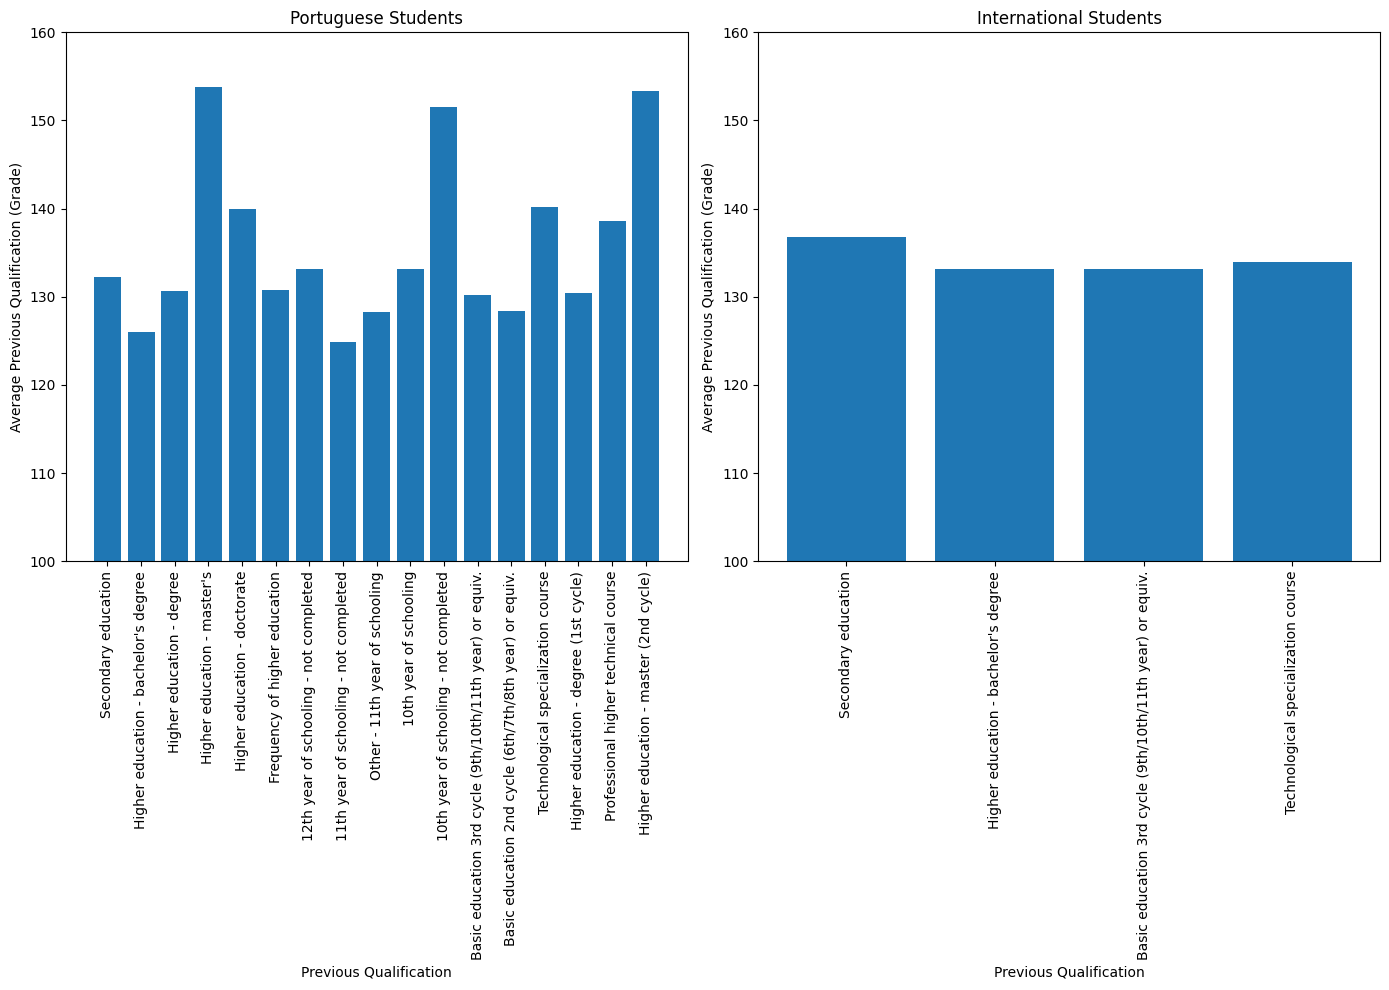

In [44]:
#| fig-cap: Relative graduation points for students with different education backgrounds
#| label: fig-education

 


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
# axes.set_ylim(100, 160)
ymin = 100 
ymax = 160 
# Plot for Portuguese Students
axes[0].bar(avg_portuguese_qualification.index,
             avg_portuguese_qualification, 
             label='Portuguese Students'

            #  marker='o'
             )

# ticks = np.arange(1, len(avg_international_qualification), 2)
# print(ticks)
axes[0].set_title('Portuguese Students')
axes[0].set_xlabel('Previous Qualification')

axes[0].set_ylabel('Average Previous Qualification (Grade)')
# axes[0].legend()
axes[0].set_ylim(ymin, ymax)
axes[0].set_xticklabels( avg_portuguese_qualification.index, rotation = 'vertical')

# Plot for International Students
axes[1].bar(avg_international_qualification.index, 
            avg_international_qualification, 
            label='International Students'
            #   marker='o'
              )
axes[1].set_title('International Students')
axes[1].set_xlabel('Previous Qualification', rotation = 'horizontal')
axes[1].set_ylabel('Average Previous Qualification (Grade)')
# axes[1].legend()
axes[1].set_ylim(ymin, ymax)
axes[1].set_xticklabels( avg_international_qualification.index,rotation = 'vertical')

# qualification_mapping 


# Adjust layout
plt.tight_layout()
plt.show()


Due to class imbalance , the variability for the Portuguese students is much higher, and while the 3 categories (see @fig-education) with highest grades are natural, i. e. doctors, masters as higher education, the 3rd is unintuitive (the 10 classes) and we tend to explain it as self-selection and high correlation with other indicators (those entering the university in the 10th grade are more motivated then dwelling in schools in 11th and 12th grades).  

Also, there is a drastic imbalance over yet another crucial factor: age. Students of age are far less ubiquitous, can have far more incentives to abandon studies and  smaller potential for apprehension of material. Indeed, this is clearly shown on the next graph [-@fig-age-distr]  

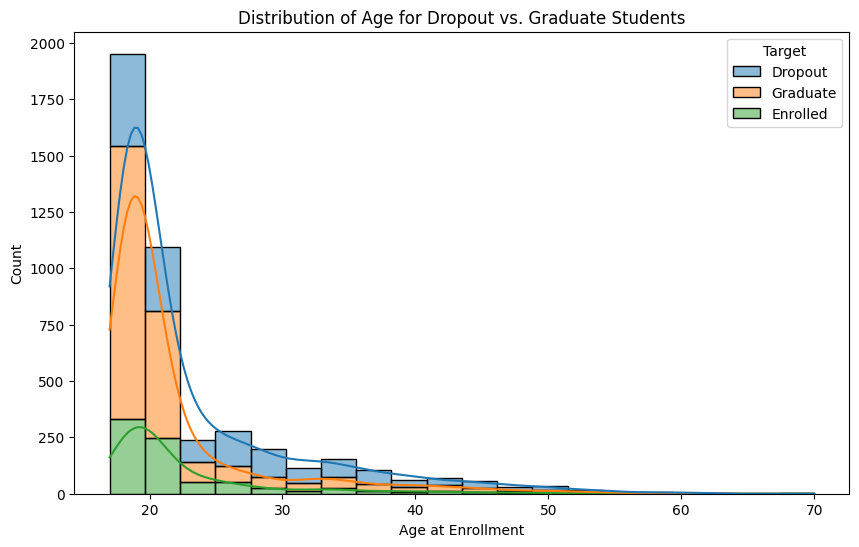

In [45]:
#| label: fig-age-distr
#| fig-cap: Distribution of age for dropout and graduate student


import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age at enrollment', hue='Target', multiple="stack", bins=20, kde=True)

plt.title('Distribution of Age for Dropout vs. Graduate Students')
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.show()

Q. v. the sizes of the bins for dropout students differ far less than the total size for the name of the student. 

In [21]:
# # Group students by previous qualification and calculate dropout rates
# dropout_rates_by_qualification = data.groupby('Previous qualification')['Tuition fees up to date'].mean()

# # Assuming dropout rates are based on the inverse of tuition fee payment
# dropout_rates = 1 - dropout_rates_by_qualification

# # Create a line chart
# plt.plot(dropout_rates_by_qualification.index, dropout_rates)

# plt.xlabel('Previous Qualification')
# plt.ylabel('Dropout Rate')
# plt.title('Impact of Previous Qualification on Dropout Rates')


If the hypothesis about some external factors is correct , the target variable should be much dependent on previous grades,  
The datapoint cloud on [Table -@fig-points-distr], however, shows that this rule has a lot of exceptions. 

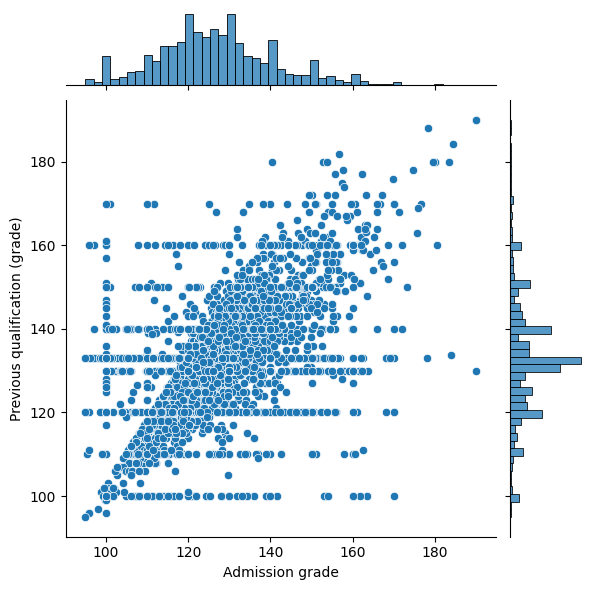

In [47]:
#| label: fig-points-distr
#| fig-cap: Joint and marginal distributions of current admission and previous qualification grades 

sns.jointplot(x='Admission grade', y='Previous qualification (grade)', data=data)

We can draw the following observations: 

*  The **distribution of admission grades** is roughly normal with most students scoring between ***120 and 160 marks***.

*  The **distribution of previous qualifications** (grades) is also the same with most of them having grades in between ***120 and 160***.

*  There is seen a **positive correlation** between admission grade and previous qualification grade indicating students with higher previous qualifications tend to have higher admission grades.


The visualizations above, however, were natural for the few quantitative columns, which show the natural interconnection between the curricularly accrued units in the 1st and in the 2nd year, which are in turn mostly unrelated to the admission grade. This is understandable since the grades are commonly based on the successfulness of the local program and student's toil, while the students' backgrounds are commonly different and this puts them into inequitable positions when passing the admission exams. 

In these previous graphs, we considered quantitative columns that are more or less exogenous to the dataset (e. g. age and the previous qualification grade are not influenced by the current grade of the students).

However, the majority of columns of this dataset are qualitative and they are at least partially endogenous as stem from the decisions during the study and their consequences. For this, we need to propose a mechanism of influence, then formulate and test a hypothesis via an analysis of discriminate groups. 





![Student mobility and financial burden as indicators and drivers of their motivation and impediments](./figs/reasons-1.jpg){#fig-word-1}

We see on @fig-word-1 that having debt is always a serious impediment against studies because it gives wrong incentives towards directly making money in the short run instead of focusing solely on one's studies that could aid to make altogether greater money in the long run. 

![Student inter-university mobility and health conditions proxies as indicators and drivers of their motivation towards learning and impediments (Part 2)](./figs/reasons2.jpg){#fig-word-2}

We also consider the impact of scholarships and other compensations in academic support, which should alleviate the complications associated with adaptations in new environment. 

![Marital status as distractor from studying](./figs/reasonsIII.jpg){#fig-word-3}

In [24]:
# Assuming dropout rates of 15% with improvements and 25% without improvements

# dropout_rates = [0.15, 0.25]
# improvements_labels = ['Schools with Improvements', 'Schools without Improvements']

# # Create a bar chart
# plt.bar(improvements_labels, dropout_rates)

# plt.xlabel('Institutional Improvements')
# plt.ylabel('Dropout Rate')
# plt.title('Effect of Institutional Improvements on Student Retention')


In different studies, it is quite common to compare the academic success of a student with the academic successes of their parents as this has both direct and indirect effects , s. a. i. e. both are connected to welfare, but also it can be that there is another channel of knowledge transmission to the younger generation. 

**Observations :**
* The bar chart shows that mother's occupation is quite influential. This influence is greater the pa's due to traditional effect, and we distinctly see that students whose mothers are 'white collars' dropout significantly more rarely than those whose mothers are more engaged in physical labor. 
<!-- 
*  The bar chart shows that *Students with mothers in lower-level occupations* tend to have higher dropout rates than compared to those with mothers in high paying jobs. -->

*  This also may suggest the mother's occupation can influence student retention, emphasizing the need for financial support and family engagement.


In [26]:
# import pycaret
import numpy as np

In [27]:
# !pip install plotly

In [28]:
# !pip install pandas scikit-learn plotly

In [29]:
# !pip install pandas 
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import plotly.express as px
# from sklearn 

In [30]:
# exampleData = pd.read_csv('data/data.csv', sep=';')

In [31]:
import matplotlib.pyplot as plt 
# plt.matshow(exampleData.corr())
from sklearn.preprocessing import StandardScaler


## Data correlation table (quantitative columns only)

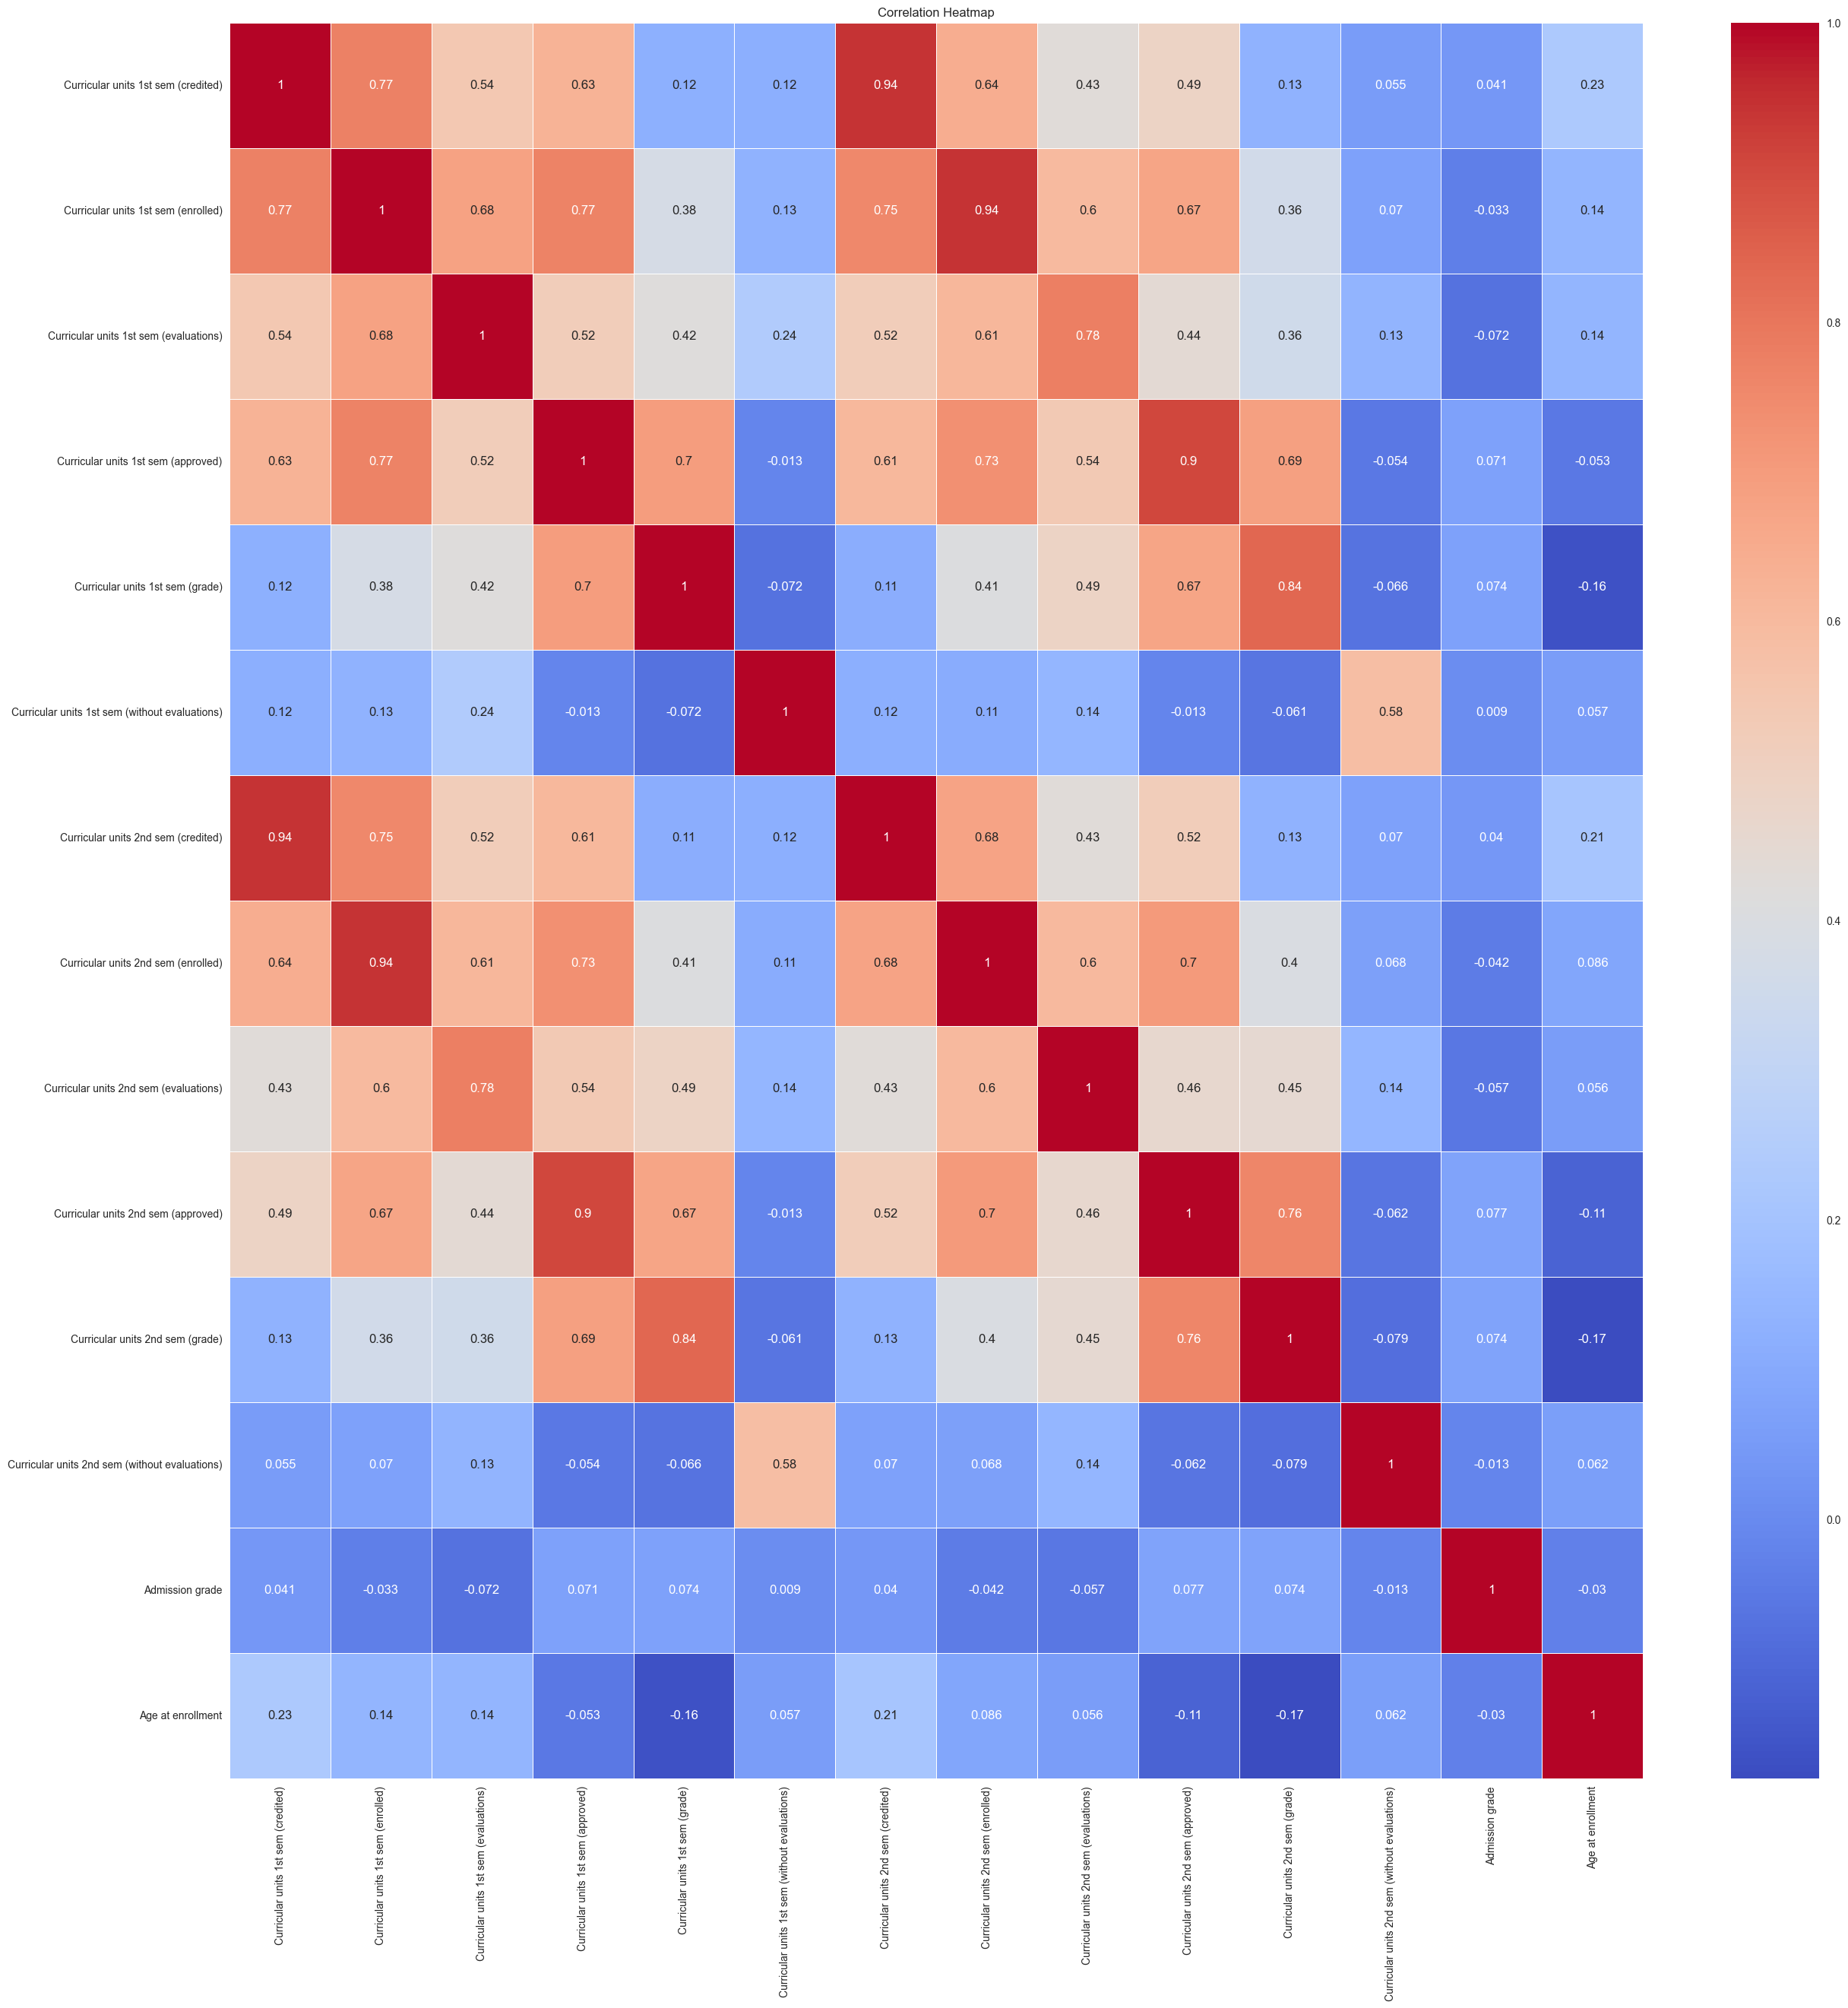

In [75]:
#| fig-cap: Data correlation table (quantitative columns are represented only since there to compute true correlations between quantitative columns it is necessary to OHE-encode them, which would burst no. of columns to many thousands, but the values of the correlations will be statistically insignificant due to low cardinality of 90% of classes)
#| label: fig-correlation



# Age at enrollment, Admission grade, 
import seaborn as sns
import matplotlib.pyplot as plt
quant_columns  = [column for column in data.columns if 'Curricular' in column] + ['Admission grade', 'Age at enrollment']
feature_columns = data.columns.drop(labels=['Target'])
quantData = data[quant_columns]
plt.figure(figsize=(30, 30))
sns.heatmap(quantData.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# plt.show()

As visible on @fig-correlation, there are strong positive correlation among the curricular units for 1st and 2nd sem that could suggest that students that are doing well in the first sem will certainly do well in the upcoming semester. This could suggest that students with lower curricular units have a higher chance of dropping out due to their academic preparedness and failing to meet the requirements and expectations of the study program.

In [ ]:
# !pip install pycaret

In [ ]:
# !python -m pip install mlflow --no-cache-dir
# !python -m pip uninstall -y pycaret
# --no-cache-dir
# import mlflow
# !python3 -m pip show  mlflow
# !python -m pip install pycaret --no-cache-dir

In [ ]:
# !which pip
# /opt/homebrew/Caskroom/miniconda/base/bin/pip
# !which python
# !pip install mlflow
# !pip show mlflow 
# !python -m pip install pycaret

In [69]:
import pycaret

In [70]:
from pycaret.classification import setup

In [71]:
from pycaret.classification import ClassificationExperiment
# dropout , predict by all other indicators 
from pycaret.regression import RegressionExperiment
# predict in simple regression the grads of 1st, 2nd year based on previous grades + 
# other factors 
from pycaret.time_series import TSForecastingExperiment
# predict in TSF manner the graduation grade on the 2nd year that are approved 
# (or by previous ) 

In [ ]:
# !pip install mlflow 
# !pip show mlflow
# !pip3 show mlflow
# !pip3 install mlflow

# !pip uninstall -y mlflow --no-cache-dir

In [ ]:
# import mlflow
# !pip install mlflow

In [ ]:
# !pip uninstall -y pycaret

In [ ]:
# !pip uninstall -y mlflow 
# !python -m pip uninstall -y mlflow

# !python -m pip install  mlflow

In [96]:
#| output: false

import sys
sys.path+=['/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages']
import mlflow
import numpy as np
SESSION_ID = np.random.randint(0, 2)

# random_integers()
# data setup for experimenting 
study  = setup(data = data ,target='Target', session_id=SESSION_ID, log_experiment=True, 
      experiment_name='predicting Targets', remove_multicollinearity=True, 
      multicollinearity_threshold=0.8, pca=True, pca_components=10, fix_imbalance=True, 
      # ordinal_features=['age', ''
      low_variance_threshold=0.1, rare_to_value=0.1, bin_numeric_features=['Age at enrollment',
                                                                            'Application order'], 
                                                                            transformation=True, 
                                                                            remove_outliers=True, 

outliers_method='iforest',  outliers_threshold= 0.05
      )
# verbose=False

# study.ClassificationExperiment()


,Description,Value
0,Session id,0
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(4424, 37)"
5,Transformed data shape,"(5966, 11)"
6,Transformed train set shape,"(4638, 11)"
7,Transformed test set shape,"(1328, 11)"
8,Numeric features,36
9,Preprocess,True


In [73]:
# from sklearn.cluster import HDBSCAN
from sklearn.inspection import permutation_importance
from sklearn.cluster import SpectralCoclustering
import plotly.io as pio
import plotly.express as px

In [76]:
quant_columns += ['GDP', 'Inflation rate', 'Unemployment rate']

In [ ]:
# qual_columns = [col for col in newData.columns if col not in quant_columns ]
# qual_columns.remove('Target')

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# ohe = OneHotEncoder(drop='first')

# X_qual = X[qual_columns]
# ohe.fit(X_qual)
# encoded_X_qual = ohe.transform(X_qual)
# # print(encoded_X_qual)
# # y_enc = LabelEncoder(y)
# leq = LabelEncoder().fit(y)
# y = leq.transform(y)


In the remaining part, we examine the correlations of purely endogenous temporal variables. This does not give a scoop about the source of causation and is not a good predictor, but exhibits an analysis of autocorrelation inside the quasi-temporal data.

In [77]:
def print_multivariable(sourceData, first_var, second_var): 
    fig = px.scatter(data_frame=sourceData, 
                     x=first_var,
                       y = second_var )
    fig.show(renderer = 'png')
    # fig.write_image(file = f"data_{first_var}_{second_var}.png", format ="png")
    # fig.save(÷)

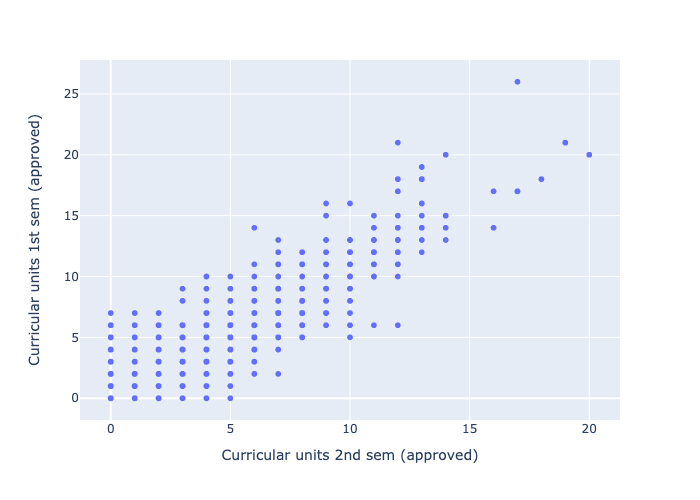

In [78]:
#| fig-cap: Vizualization for curricular successively approved units
#| label: fig-cur-units


print_multivariable(sourceData=data, 
                    first_var= 'Curricular units 2nd sem (approved)', 
                    second_var ='Curricular units 1st sem (approved)' )

We can see that the points for the 1st semester and 2nd semester are correlated which shows that are one's marks are primary drivers of success and exhibit sizeable correlations 

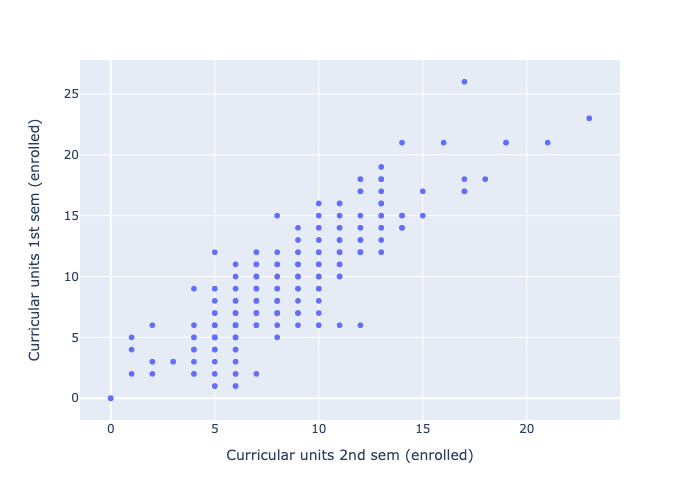

In [79]:
#| fig-cap:  Vizualization for curricular successively enrolled units
#| label: fig-cur-units-enrolled
print_multivariable(sourceData=data, 
                    first_var= 'Curricular units 2nd sem (enrolled)', 
                    second_var ='Curricular units 1st sem (enrolled)' )

In [80]:
# #| fig-cap: 

# print_multivariable(sourceData=data, 
#                     first_var= 'Curricular units 1st sem (approved)', 
#                     second_var ='Curricular units 2nd sem (approved)' )

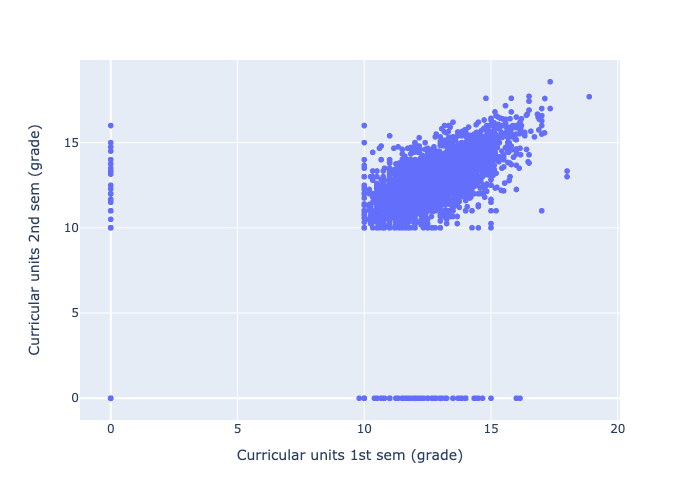

In [81]:
#| fig-cap: Vizualization of curricular units for the 1st semester
#| label: fig-cur-grade


print_multivariable(sourceData=data, 
                    first_var= 'Curricular units 1st sem (grade)', 
                    second_var ='Curricular units 2nd sem (grade)' )

## Unmentioned data issues 

While the dataset does not have empty columns , there is some auxiliary data that could be very appropriate to have together with it. For example, we have data for years that are many in today's changing education environment, but there is no open data as proxy for the conditions in which the students have to study and which influence their dropout ratios (causing affection or not). Apart from data on schorlarships, any transitions and their effect (even though hapenned during reforms in Portugal education field in 2000s-10s) are downplayed. 
Another significant challenge are extraneous events that fundamentally influence the life of student, such as permanent homecare of one of the relatives, or a new job, or transfer to another university which is more preferable. In each of three and arguably more cases, no known factors can stop a person from leaving, and any model on this dataset would fail. From the societal point of view, these leaves should not be pejorized as dropouts, since this makes students more felicitous. 
 Since employment and civil status could be retrieved from Social Services, it would be nice if we checked our model against 'undesirable' leaves only. 



# Data Mining (Analysis) {#sec-data-mining} 

## ML pipeline design 

Now, we need to define our data mining strategy.

In the matrix [-@fig-correlation] for correlations, we already see high correlations between many values. Hence, if we (certainly we should) also consider categorical  variables in our data mining analysis, we must reduce the number of variables because the true dimensionality of the initial space is too high and virtually all ways of embedding and distance calculation are too costly and prohibitive given a relatively small amount of datapoints in this dataset. 

In EDA [@sec-eda], we already stressed the issue of class imbalance. To at least partially recompense for this, we need to perform SMOTE augmentation of scarcer classes. 
After dataset is SMOTE-amplified, our common step would be to dispose of multicollinear columns.  
High dimensionality prevents intuitive DBSCAN threshold setting and some inferior algorithms as TSNE. Hence, although not considering distal non-linear data structures, we reduce the dimensionality via principal component analysis.
After we perform the PCA, we perform Yeo-Johnson power transform to make dedimensionalized data look more like multivariate normal distribution (although some features like schooling points already have near-normal distribution, joint distribution normality for a vector linear combinations is not guaranteed without pretransforming). After the distribution of the data has become closer to Normal Multivariate, it is now possible to apply the outlier detection method. Since the linear PCA transform has alienated initial neighbours and thwisted the distances, it is not correct to apply distance-based outlier detection methods such as outlier kNN, LOF, and others. Instead, we would apply such method as Isolation Forest, because its criterion is invariant by linear transformation, and now,  given the unimodality of the distribution, it is straghtforward to locate the outliers based on their secludibility. 


Then several estimators from various standard families are independently trained and va  fine-tuned, by mean F1 measure, the model that is most precise in predicting the outcome is rendered. We confer some other renowned metrics for the best model .
In total, we consider 3 different types of models  for classification (logical, linear separative, linear generative),
implying algorithms of various 'difficulty' levels, including 3 boostings: LGBoosting, XGBoosting (gbc), Catboost, Random Forest, a Decision Tree as well as linear discriminate analysis and logistic regression. We test models against each other and against dummy classifier. 
The results of the best models are given in leaderboard   below in [@tbl-leaderboard]. 
<!-- @tbl-leaderboard. -->

## Data mining application 

In [113]:
#| tbl-cap: Results of fitting estimators of different families
#| label: tbl-leaderboard

study_results = study.compare_models(cross_validation=True, sort='F1', verbose=True,
                                   exclude=['svm', 
                                            'nb', 'knn', 
                                            'qda', 'ada', 
                                            'et']   )
# study_results[1]
# verbose=False

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6954,0.8582,0.6954,0.7352,0.7074,0.5180,0.5243,0.8270
rf,Random Forest Classifier,0.6993,0.8589,0.6993,0.7217,0.7071,0.5171,0.5198,0.1980
lda,Linear Discriminant Analysis,0.6906,0.8485,0.6906,0.7445,0.7055,0.5132,0.5224,0.0480
catboost,CatBoost Classifier,0.6980,0.8544,0.6980,0.7169,0.7047,0.5142,0.5162,1.4590
lightgbm,Light Gradient Boosting Machine,0.6948,0.8544,0.6948,0.7184,0.7026,0.5103,0.5133,0.8540
ridge,Ridge Classifier,0.6922,0.0000,0.6922,0.7188,0.6998,0.5049,0.5088,0.0480
dt,Decision Tree Classifier,0.6292,0.7185,0.6292,0.6475,0.6365,0.4100,0.4115,0.0590
lr,Logistic Regression,0.4487,0.5142,0.4487,0.3634,0.3983,0.0827,0.0909,0.4610
dummy,Dummy Classifier,0.3211,0.5000,0.3211,0.1031,0.1561,0.0000,0.0000,0.0430


Thus, the best model by F1 measure is CatBoostClassifier, which is renowned for scoring fairly well on low magnitude tabular data, while ordinary GBC is the most second to prime and the most robust one, featuring best conventional recall, accuracy, and AUC metrics. 

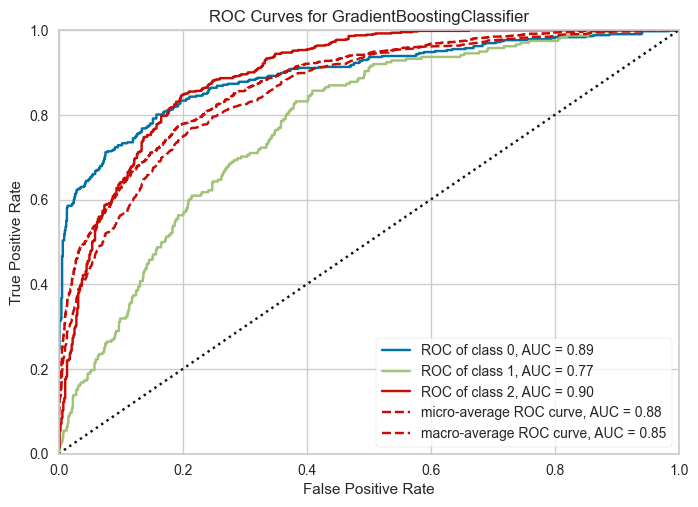

In [121]:
#| label: fig-rocauc
#| fig-cap: Stylized ROC curves for the Catboost Model (for different classes and on average)


study.plot_model(estimator=study_results, plot='auc',verbose=False, display_format =None)
# 'confusion matrix'd

In [ ]:
# !pip install graphviz

In [ ]:
# study_results.
# study.

In [ ]:
# !pip install shap

In [ ]:
# import shap
# study.interpret_model(study_results, plot='summary')

In [ ]:
# study_results.feature_importances_

In [ ]:
# study_results.plot_tree(tree_idx=0, )

In [103]:
# model_structure =study.save_model(model=study_results, model_name='models/SOTA_catboost', verbose=False  )
# './models_top_model.pkl'



However, while all top models in @tbl-leaderboard demonstrate significant improvement over a dummy classifier and other simplistic models such as Logistic Regression, the scores still a lot to be desired,
which indicates that reduction of dimensionality, which is inevitable under given class imbalance, has come at a price of variance loss, or, alternatively, all the covariates do not explain sufficiently well the outcome of studies: in academic success, as in life, a lot depends on the proper characteristics of a person which are difficult to elicit and much is undetermined. Partially, such a moderate result can be exaplained by the multiclass nature of the test: the ROCAUC plot on [@fig-rocauc] shows, AUC is worse on class 1, i. e. "Enrolled". These enrolled people have include both pending dropouters and diligent scholars, and the core feature of the model is that it can tell two other classes apart better, with ROCAUC 0.91. Thus, this model can generally be used as an indicator of a soon dropout of a student which the universities can be wary of, undertaking the corrective action or allocating the stipends.  

# Results

With this analysis, we have some valuable insights about some crucial factors like academic support, socioeconomic factors, age, previous qualifications, and others that play a significant role in student retention. We have built a model on all available data to predict the dropout rate of students, that is quite lightweight, production-ready and thus can easily be incorporated into some advisory system. 

 The observed patterns imply a lot to stress and decide in the lives of students and their associates. First, we strive to insentivize parents to improve their labour efficiency and pursue greater carreer so that ultimately they could dedicate more time to their children's education, and proactively stir their self-propelled interest. 
 Additionally, we could provide financial assistance to those who are struggling to pay with if this is contemporaneous with a significant degradation in their university marks, as this subrogates the stimuli for a person in an age where they are most perceptive to knowledge and is a good predictor of a dropout. 
 Also importantly, we could teach the students, especially going on their second studies, that it is quite unlikely that they are going to get high grades or exit the university without proper time management and confirmation that they assign top priority to their studies. They are also advised to make that clear to all their relatives and stakeholders who might underestimate the effects of such a change. Although this could result in a reduction of enthusiastic entrants, this would increase at least the KPI of retention and arguably also increase the KPI on number of diplomas issued, because with fewer but more motivated students the university would have more time to dedicate to most obstinate pending alumni.

 Addressing these factors carefully can effectively lead to dropout rates reduction and improve overall student outcomes







In [24]:
# lists_of_scholarships = [el for el in  if 'Scholarship' in el ]



In [25]:
# X_quant  = X[quant_columns]
# fig = px.histogram(data_frame=newData, 
#                     x='Age at enrollment' )
# fig.show()

In [26]:
# N_data = pd.DataFrame.sparse.from_spmatrix(encoded_X_qual, columns=ohe.get_feature_names_out())